<a href="https://colab.research.google.com/github/oozdal/Dive-Into-Deep-Learning/blob/main/Quiz_GeoData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from random import randint
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier # Import KNN
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataframes
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Geo_Data/Quiz_Geodata.csv')
df.head()

,Sample ID,Mine_X,Mine_Y,ROCK_CODE,LITHOLOGY,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
0,934695,660737.735,649040.0241,via,"intermediate metavolcanics, andesite",5.97796,-1.10484,-3.62452,-1.67432,3.27106,-2.26489,-0.58045,142.91821,193.10095,113.30829,121.73574,154.12782,104.85649,26.55841,122.45712,0.12053,100.14873,0.46705,1.32415,2.83511,996.02423,0.30820,0.87379,24.80857,0.20931,37625.66016,-0.34434,-4.12665,-0.00243,-0.11172,37621.73828,52.36612,0.24179
1,970835,651737.735,645940.0241,czc,colluvium,5.81115,-1.32055,-3.23891,-2.22241,3.20986,-2.51727,0.27813,76.99291,167.69888,144.52396,162.16195,127.57177,110.70765,90.62203,96.91898,21.22627,49.94348,0.33151,1.50529,4.54069,929.00000,0.26941,1.22329,36.70579,-0.00106,37601.35547,0.33565,-1.49423,0.00044,0.02497,37613.42969,73.24493,0.08826
2,940244,659337.735,651840.0241,czc,colluvium,5.83264,-0.93351,-3.66603,-1.77992,3.25427,-2.15108,-0.55637,76.76710,123.79849,106.33829,255.00000,161.22342,126.32040,70.18222,95.69851,43.21043,87.39690,0.38286,1.35107,3.52886,923.88593,0.23114,0.81564,26.10466,0.09058,37708.75391,-1.14056,-13.07700,-0.00017,-0.07282,37532.49609,114.20567,0.09173
3,984112,648037.735,660440.0241,vf,"felsic metavolcanics, volcaniclastics",5.83562,-1.35447,-3.04383,-2.26993,2.90143,-2.15469,0.08587,32.91221,178.51571,0.00000,255.00000,0.00000,134.69373,42.36391,85.92356,255.00000,176.64225,0.40147,2.72224,6.78062,923.62732,0.43726,2.96487,78.32278,-0.09097,37416.84375,0.79877,18.72101,0.00110,0.11432,37824.92188,175.93372,0.21642
4,928923,662337.735,641440.0241,g_lm,granitoid,5.65466,-1.00990,-3.49886,-2.18773,3.07253,-2.30904,0.27835,84.06156,155.04641,48.66912,168.30419,78.77231,111.59666,106.80603,100.90544,131.43489,121.07295,0.30485,1.42528,4.67527,1021.68750,0.31072,1.45272,40.11269,-0.35156,37543.32422,0.15003,-0.95493,0.00168,0.07679,37717.68750,67.94227,0.38765


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample ID   14552 non-null  int64  
 1   Mine_X      14552 non-null  float64
 2   Mine_Y      14552 non-null  float64
 3   ROCK_CODE   14552 non-null  object 
 4   LITHOLOGY   14550 non-null  object 
 5   AlCLR       13999 non-null  float64
 6   CrCLR       13999 non-null  float64
 7   NbCLR       13999 non-null  float64
 8   NiCLR       13999 non-null  float64
 9   TiCLR       13999 non-null  float64
 10  YCLR        13999 non-null  float64
 11  ZrCLR       13999 non-null  float64
 12  MgOHgpcont  14552 non-null  float64
 13  MgOHgpcomp  14552 non-null  float64
 14  kaolgpinde  14552 non-null  float64
 15  FeOusIdx    14552 non-null  float64
 16  FeOHgpcont  14552 non-null  float64
 17  FeMgOHcont  14552 non-null  float64
 18  FeicOxcont  14552 non-null  float64
 19  FeicOxcomp  14552 non-nul

In [ ]:
df.describe()

,Sample ID,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
count,14552.000000,14552.000000,14552.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,13999.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000
mean,904270.535115,657030.876836,656456.887761,5.671462,-1.034787,-3.423178,-1.816301,3.176624,-2.282678,-0.291142,67.048728,149.953520,85.644164,204.468304,86.447702,113.897563,75.374404,91.091707,95.555283,81.677102,0.353096,1.750392,5.158874,950.972419,0.300789,1.505770,43.233520,0.000356,37594.329727,-0.306519,-0.712009,0.000013,-0.002902,37630.183149,90.533615,0.230242
std,198204.261041,6629.956380,9017.918927,0.172538,0.240079,0.221883,0.254426,0.120837,0.148921,0.251105,37.111486,54.360347,54.171011,62.996047,61.589899,31.642101,42.358620,23.081187,75.647568,44.590869,0.072823,0.536530,2.073105,65.077860,0.087163,0.640479,17.153027,0.225615,77.416103,0.823933,25.327478,0.002636,0.242506,76.502550,49.631527,0.224115
min,94434.000000,645537.735000,639940.024100,4.872160,-1.727580,-4.541340,-2.741230,2.500380,-2.842170,-1.158360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157060,0.538150,1.452100,831.606630,0.109960,0.450690,13.882030,-2.132710,37283.628910,-1.562400,-123.363640,-0.019770,-1.528200,37416.300780,1.466300,0.002650
25%,928068.500000,651337.735000,648840.024100,5.543595,-1.185965,-3.550865,-1.985610,3.110425,-2.379210,-0.457730,43.716007,126.529230,44.215480,175.873022,31.819513,112.234400,48.229350,90.195260,33.692023,52.371545,0.305790,1.365327,3.963295,901.704573,0.236740,1.102898,33.286805,-0.062505,37549.696290,-1.035420,-12.885143,-0.000810,-0.103983,37576.393555,56.499052,0.072750
50%,949802.500000,657037.735000,656640.024100,5.646510,-1.042410,-3.402190,-1.789400,3.174450,-2.298090,-0.325260,67.650815,155.647180,90.905895,223.730000,89.295010,119.190305,74.506070,95.627515,83.020365,79.018490,0.345220,1.714855,5.043690,936.184785,0.283920,1.330970,39.564415,0.022315,37604.429685,-0.449850,-5.249050,-0.000090,-0.036455,37616.669925,82.823105,0.156945
75%,972673.750000,662637.735000,664140.024100,5.781295,-0.899515,-3.281750,-1.642580,3.246450,-2.205000,-0.155025,90.866912,184.042950,128.038400,255.000000,133.774585,127.740320,100.267705,100.820948,144.369030,109.033297,0.388100,2.024250,5.884565,995.101698,0.349108,1.669445,47.256177,0.083710,37645.000975,0.361943,7.925038,0.000550,0.059710,37667.815430,112.489585,0.313905
max,992171.000000,668937.735000,671940.024100,6.419910,0.180690,-2.174150,-0.749120,3.727700,-1.370610,0.608330,234.908740,255.000000,255.000000,255.000000,255.000000,178.151420,255.000000,134.398850,255.000000,255.000000,1.009250,5.740750,23.509740,1281.580570,0.773010,4.702100,150.210950,1.678700,37935.574220,1.558540,199.711060,0.034270,2.252570,38052.019530,453.248290,2.550140


In [ ]:
# Let's check the correlation matrix
corr = df.corr().abs()
corr

,Sample ID,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
Sample ID,1.000000,0.514809,0.043497,0.044537,0.062348,0.168954,0.040654,0.066945,0.073344,0.208210,0.197687,0.154833,0.004734,0.047488,0.032014,0.026889,0.066113,0.143556,0.032389,0.123093,0.016676,0.100273,0.079995,0.408641,0.049448,0.107220,0.119746,0.039453,0.279692,0.003754,0.041634,0.001375,0.022983,0.114101,0.013810,0.020542
Mine_X,0.514809,1.000000,0.059042,0.015764,0.017676,0.433545,0.126308,0.042752,0.174136,0.103537,0.454733,0.324286,0.078440,0.041007,0.147702,0.098978,0.106721,0.267771,0.138174,0.204827,0.006875,0.377945,0.308461,0.609989,0.146673,0.416746,0.441558,0.032144,0.515756,0.042732,0.038153,0.001411,0.019015,0.234229,0.194095,0.118973
Mine_Y,0.043497,0.059042,1.000000,0.314012,0.057793,0.223633,0.108962,0.052850,0.048704,0.144052,0.197397,0.132147,0.041989,0.117644,0.018602,0.045651,0.200565,0.070484,0.051631,0.129779,0.315495,0.305390,0.056867,0.272029,0.108282,0.012373,0.026343,0.008525,0.122714,0.021237,0.015737,0.003621,0.009529,0.040530,0.306281,0.076913
AlCLR,0.044537,0.015764,0.314012,1.000000,0.452726,0.187598,0.473406,0.029948,0.456854,0.105811,0.147677,0.159305,0.171357,0.133177,0.077078,0.015755,0.185788,0.076886,0.080393,0.243607,0.037687,0.333253,0.256445,0.431041,0.368581,0.032448,0.085302,0.010230,0.054362,0.057374,0.015917,0.000146,0.009387,0.006241,0.071721,0.032684
CrCLR,0.062348,0.017676,0.057793,0.452726,1.000000,0.442979,0.720247,0.020042,0.605291,0.614741,0.084546,0.014336,0.064836,0.057971,0.047557,0.000712,0.133559,0.029359,0.065575,0.068145,0.171313,0.134845,0.199872,0.137786,0.168752,0.321057,0.286636,0.006883,0.008752,0.029766,0.011108,0.000419,0.006545,0.032448,0.026414,0.025292
NbCLR,0.168954,0.433545,0.223633,0.187598,0.442979,1.000000,0.460098,0.259123,0.068959,0.300578,0.410401,0.267598,0.024229,0.019174,0.057384,0.048124,0.094087,0.157227,0.080242,0.209763,0.194479,0.593702,0.580978,0.481806,0.082760,0.481481,0.565858,0.018011,0.269123,0.000993,0.031029,0.001781,0.017307,0.105491,0.025243,0.068027
NiCLR,0.040654,0.126308,0.108962,0.473406,0.720247,0.460098,1.000000,0.063382,0.508786,0.698768,0.120095,0.015594,0.076086,0.096414,0.076901,0.043066,0.128336,0.007733,0.082082,0.037269,0.169017,0.151839,0.218532,0.118181,0.273552,0.429165,0.370556,0.016209,0.091854,0.073638,0.032466,0.002133,0.020001,0.134822,0.052380,0.112624
TiCLR,0.066945,0.042752,0.052850,0.029948,0.020042,0.259123,0.063382,1.000000,0.064403,0.356084,0.133832,0.020466,0.078739,0.066002,0.098911,0.038349,0.025828,0.034220,0.097285,0.025215,0.240555,0.182083,0.272306,0.001780,0.091942,0.186652,0.226594,0.033252,0.030778,0.055826,0.062095,0.015088,0.044516,0.021934,0.027455,0.082662
YCLR,0.073344,0.174136,0.048704,0.456854,0.605291,0.068959,0.508786,0.064403,1.000000,0.217198,0.079543,0.089089,0.111271,0.020349,0.051507,0.034085,0.121038,0.065942,0.076044,0.165965,0.083401,0.160784,0.161706,0.393699,0.302486,0.067773,0.029999,0.027343,0.067122,0.074893,0.042972,0.010075,0.031130,0.006956,0.098380,0.009980
ZrCLR,0.208210,0.103537,0.144052,0.105811,0.614741,0.300578,0.698768,0.356084,0.217198,1.000000,0.052923,0.062219,0.014650,0.098242,0.036770,0.028274,0.128997,0.066431,0.021437,0.034587,0.354313,0.170119,0.302299,0.148411,0.034747,0.343682,0.334945,0.032159,0.044397,0.006756,0.050206,0.012950,0.035104,0.076556,0.126350,0.054944


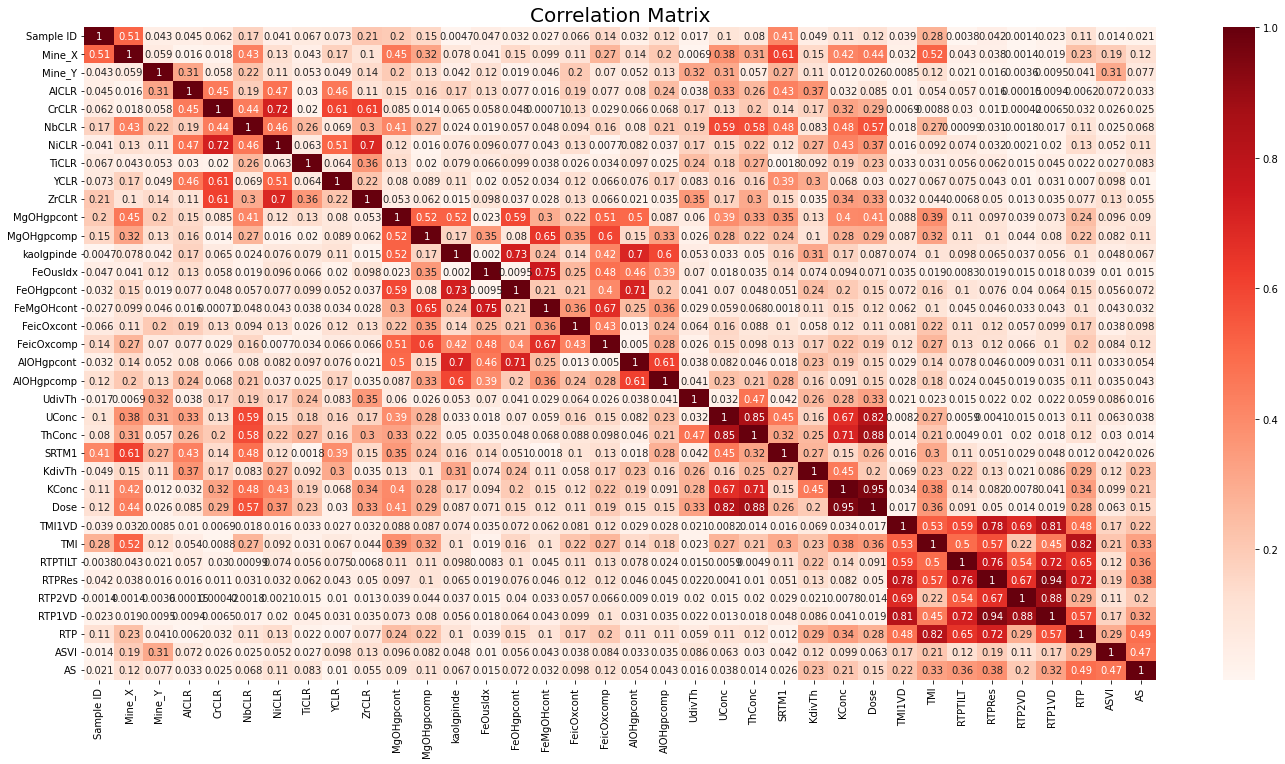

In [ ]:
# Let's visualize the correlation matrix 
plt.rcParams['figure.figsize'] = (24.0, 12.0)
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
ax1 = sns.heatmap(corr, annot=True, cmap="Reds")
plt.title("Correlation Matrix", size=20)
plt.show()

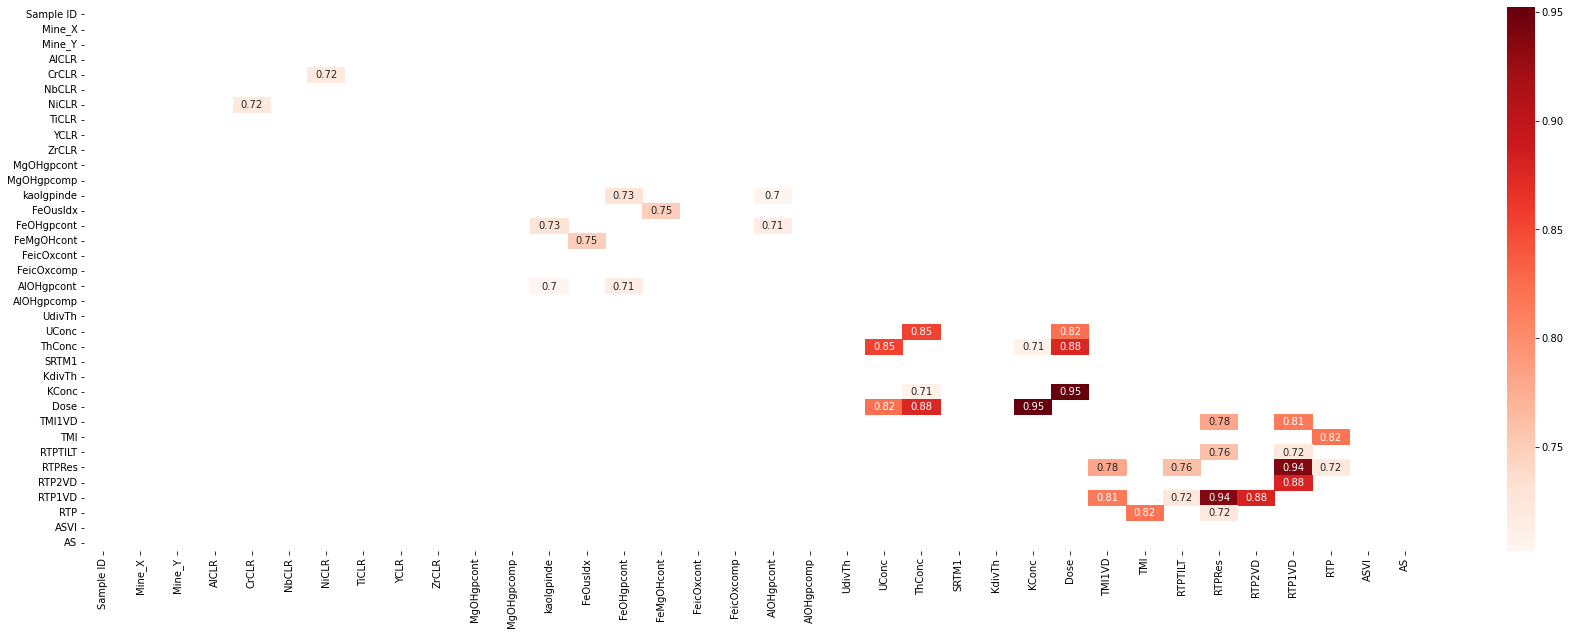

In [ ]:
#Let's simplify the correlation matrix to see the only elements where the correlation is higher than 0.7
#Let's also exclude diagonal elements. 
dfCorr = corr
filteredDf = dfCorr[(dfCorr >= .7) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
# A function to create the correlation matrix, filter it, and then flatten it.
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

corrFilter(df, .7) # correlations higher than 0.7

Dose        KConc         0.952393
RTP1VD      RTPRes        0.938185
            RTP2VD        0.879142
ThConc      Dose          0.876526
UConc       ThConc        0.853904
            Dose          0.823227
RTP         TMI           0.819222
TMI1VD      RTP1VD        0.814687
            RTPRes        0.779468
RTPTILT     RTPRes        0.761356
FeMgOHcont  FeOusIdx      0.749051
kaolgpinde  FeOHgpcont    0.729077
RTPTILT     RTP1VD        0.724324
RTP         RTPRes        0.720626
NiCLR       CrCLR         0.720247
AlOHgpcont  FeOHgpcont    0.714097
ThConc      KConc         0.707923
AlOHgpcont  kaolgpinde    0.702154
Sample ID   Sample ID          NaN
dtype: float64

In [ ]:
#Another way to do the same job 
#The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.iloc[:10] # Highest 10 correlations

KConc    Dose      0.952393
RTPRes   RTP1VD    0.938185
RTP2VD   RTP1VD    0.879142
ThConc   Dose      0.876526
UConc    ThConc    0.853904
         Dose      0.823227
TMI      RTP       0.819222
TMI1VD   RTP1VD    0.814687
         RTPRes    0.779468
RTPTILT  RTPRes    0.761356
dtype: float64

Highest correlations

1) KConc   vs Dose     -> (Potassium concentration vs Total radioactivity received by sensor)

2) RTPRes  vs RTP1VD   -> (Residual of Reduced to Pole magnetics vs 1st vertical derivative of Reduced to Pole magnetics)

3) RTP2VD  vs RTP1VD   -> (2nd vertical derivative of Reduced to Pole magnetics vs 1st vertical derivative of Reduced to Pole magnetics)

4) ThConc  vs Dose     -> (Thorium concentration vs Total radioactivity received by sensor)

5) UConc   vs ThConc   -> (Uranium concentration vs Thorium concentration)

6) TMI     vs RTP      -> (Total magnetic intensity vs Reduced to Pole magnetics)

7) TMI1VD  vs RTP1VD   -> (1st vertical derivative of total magnetic intensity vs 1st vertical derivative of Reduced to Pole magnetics)

8) RTPTILT vs RTPRes   -> (Tilt derivative of Reduced to Pole magnetics vs Residual of Reduced to Pole magnetics)

# Missing Values

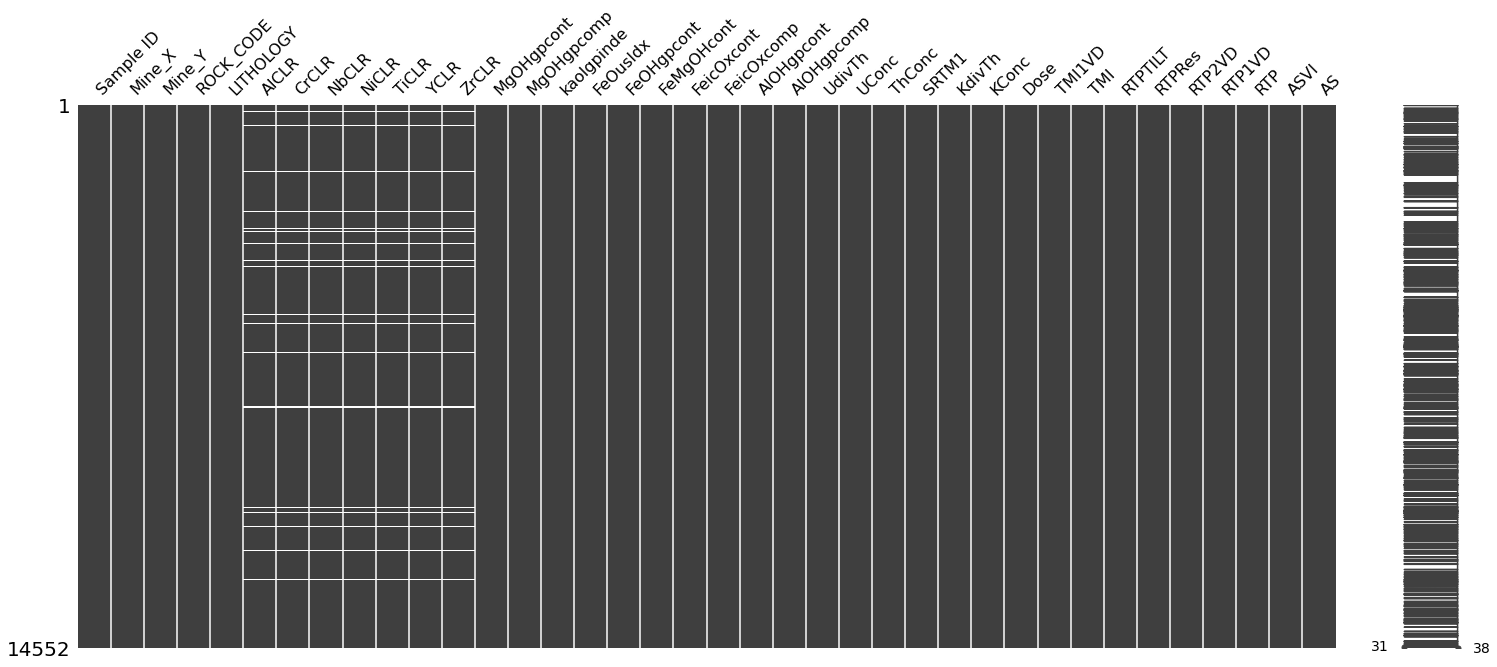

In [ ]:
# get the first impression of missing values
msno.matrix(df);

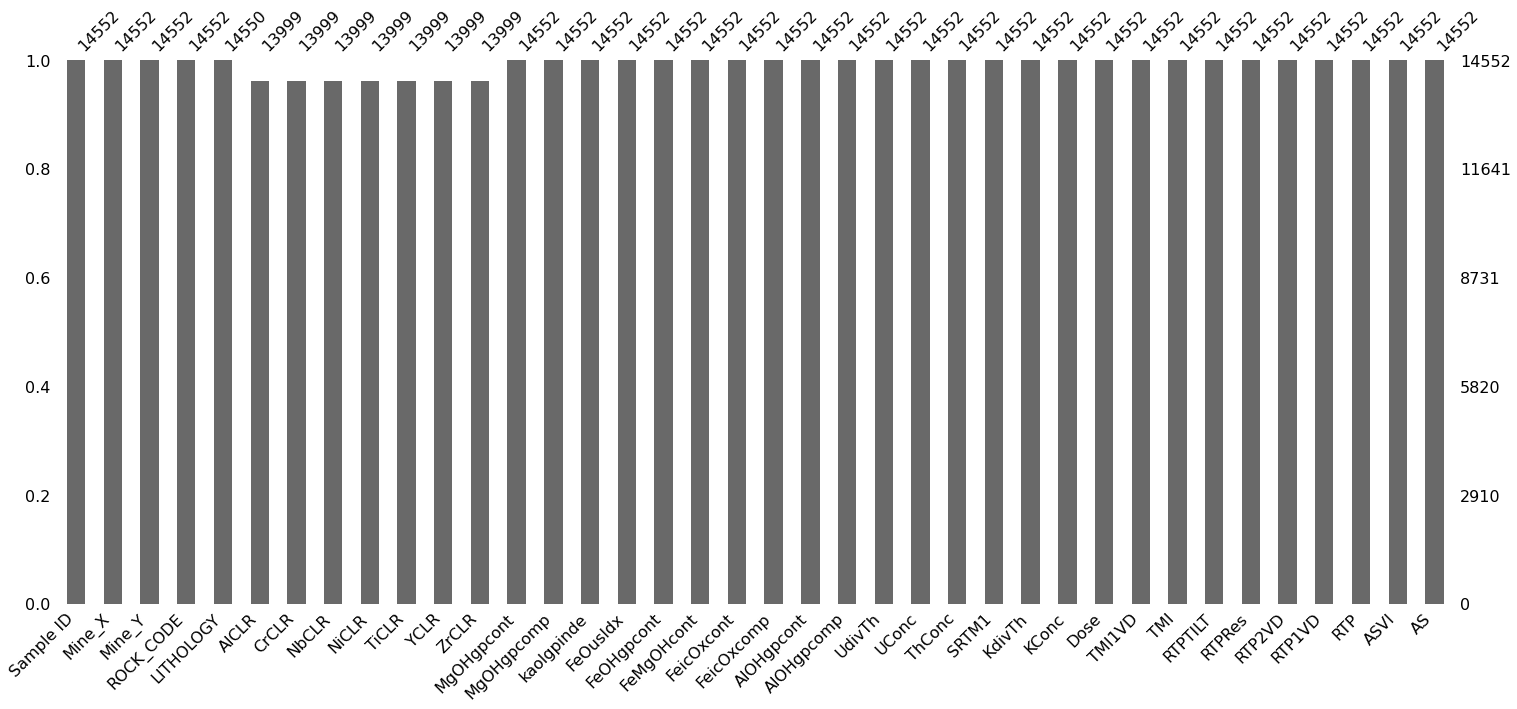

In [ ]:
msno.bar(df);

In [ ]:
# Percentage of null values
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

LITHOLOGY's null rate :0.01%
AlCLR's null rate :3.8%
CrCLR's null rate :3.8%
NbCLR's null rate :3.8%
NiCLR's null rate :3.8%
TiCLR's null rate :3.8%
YCLR's null rate :3.8%
ZrCLR's null rate :3.8%


In [ ]:
# As null values are a small part of the data, let's drop those rows
df.dropna(how="any", inplace = True)

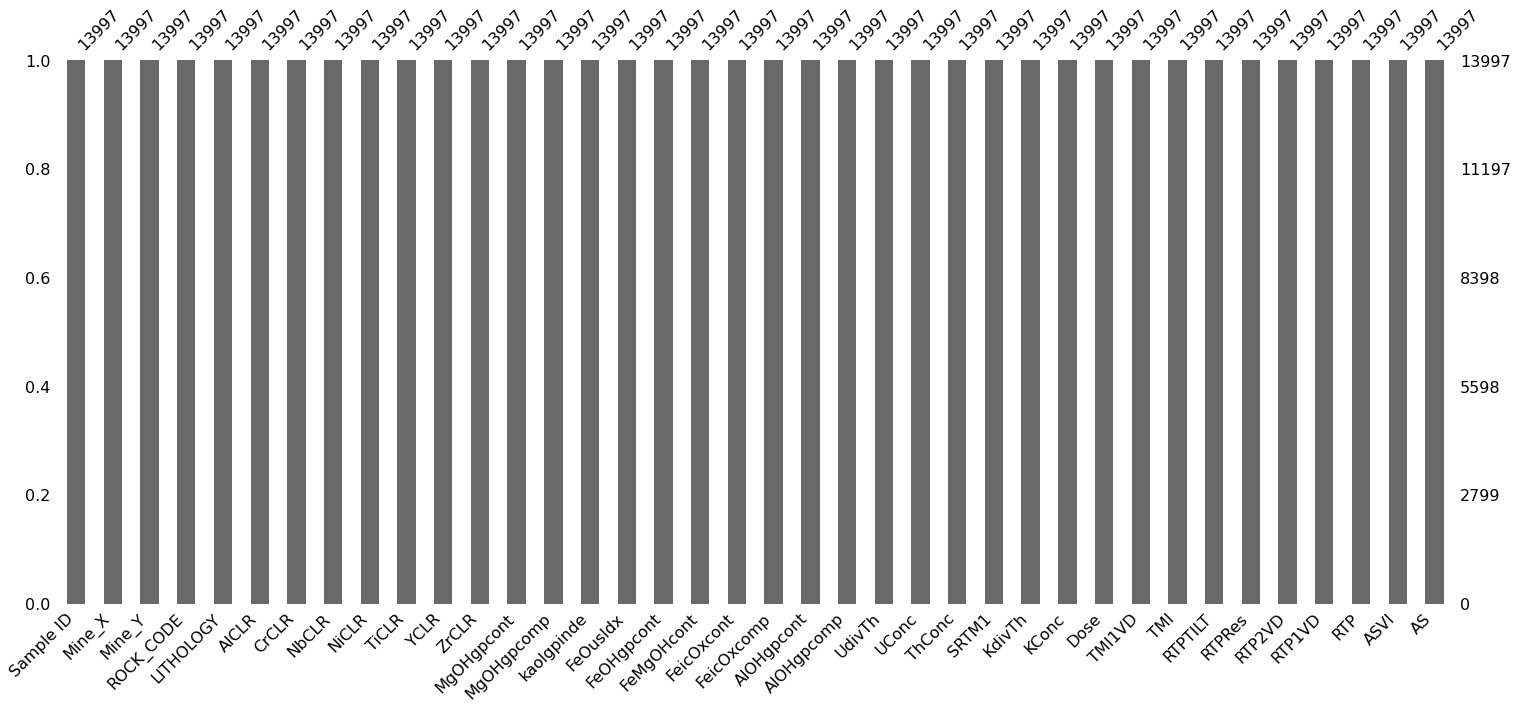

In [ ]:
# Let's check again
msno.bar(df);

In [ ]:
# Percentage of null values
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

The above for loop no longer runs any null values. No more null values!

# Fixing data types

In [ ]:
df.ROCK_CODE.unique()

array(['via', 'czc', 'vf', 'g_lm', 'qa', 'g', 'gf', 'vm', 'vsi', 's',
       'mf', 'svm', 'gfm', 'vmi', 'gd', 'vsf', 'mmc', 'svi', 'sp', 'gyl',
       'ivg', 'svx', 'svf'], dtype=object)

In [ ]:
df.LITHOLOGY.unique()

array(['intermediate metavolcanics, andesite', 'colluvium',
       'felsic metavolcanics, volcaniclastics', 'granitoid', 'alluvium',
       'foliated to gneissic granitoid', 'metabasalt',
       'intermediate metavolcaniclastics, some volcanics',
       'metasediments', 'felsic schists',
       'mafic-intermediate volcaniclastics to epiclastics; also chloritic shale/slate',
       'mafic granitoid gneiss, strong magnetic banding',
       'metabasaltic andesite; meta andesite', 'granodiorite',
       'felsic volcanics, volcaniclastics and felsic schist',
       'chlorite-sericite schist, chlorite schist, phylitte, quartz-chlorite-micaschist',
       'intermediate volcaniclastics-epiclastcis, incl fine-grained chloritic schist/slate',
       'polymictic, conglomerate, boulders to pebbles',
       'younger granitoid, late tectonic',
       'metagabbro: metamorphosedsynvolcanic mafic intrusives',
       'bimodal felsic and mafic volcanisclastics+minor volcanics',
       'metagreywacke, fel

In [ ]:
# The type of "ROCK_CODE" should be a category
df["ROCK_CODE"] = pd.Categorical(df["ROCK_CODE"])
df["LITHOLOGY"] = pd.Categorical(df["LITHOLOGY"])

In [ ]:
df.dtypes

Sample ID        int64
Mine_X         float64
Mine_Y         float64
ROCK_CODE     category
LITHOLOGY     category
AlCLR          float64
CrCLR          float64
NbCLR          float64
NiCLR          float64
TiCLR          float64
YCLR           float64
ZrCLR          float64
MgOHgpcont     float64
MgOHgpcomp     float64
kaolgpinde     float64
FeOusIdx       float64
FeOHgpcont     float64
FeMgOHcont     float64
FeicOxcont     float64
FeicOxcomp     float64
AlOHgpcont     float64
AlOHgpcomp     float64
UdivTh         float64
UConc          float64
ThConc         float64
SRTM1          float64
KdivTh         float64
KConc          float64
Dose           float64
TMI1VD         float64
TMI            float64
RTPTILT        float64
RTPRes         float64
RTP2VD         float64
RTP1VD         float64
RTP            float64
ASVI           float64
AS             float64
dtype: object

# Data Visualization

In [ ]:
# Statistics of logged rock type
df.ROCK_CODE.value_counts().sort_values(ascending=False)

czc     5116
via     1973
g_lm    1138
vsi     1088
vf       864
vm       704
qa       559
mf       513
svi      489
g        388
svm      361
gfm      202
gf       167
vsf      117
gyl       64
vmi       61
svf       58
mmc       46
gd        31
sp        25
ivg       12
svx       11
s         10
Name: ROCK_CODE, dtype: int64

In [ ]:
# Statistics of LITHOLOGY
df.LITHOLOGY.value_counts().sort_values(ascending=False)

colluvium                                                                             5116
intermediate metavolcanics, andesite                                                  1973
granitoid                                                                             1526
intermediate metavolcaniclastics, some volcanics                                      1088
felsic metavolcanics, volcaniclastics                                                  864
metabasalt                                                                             704
alluvium                                                                               559
felsic schists                                                                         513
intermediate volcaniclastics-epiclastcis, incl fine-grained chloritic schist/slate     489
mafic-intermediate volcaniclastics to epiclastics; also chloritic shale/slate          361
mafic granitoid gneiss, strong magnetic banding                                        202

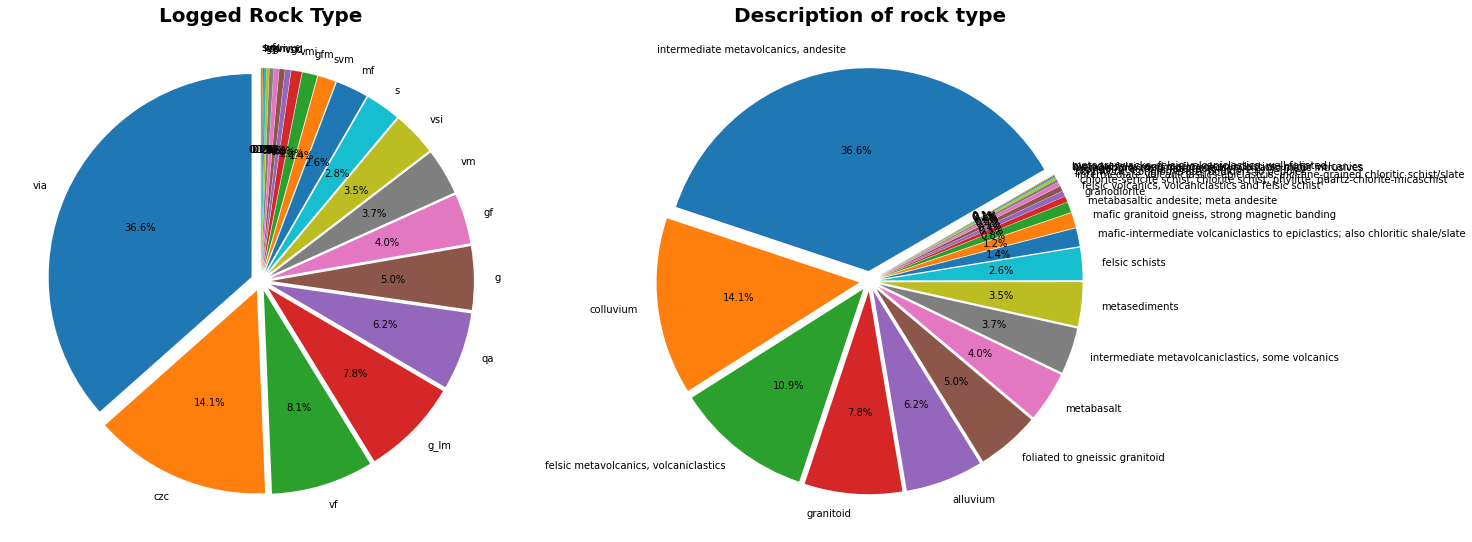

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

labels=['via', 'czc', 'vf', 'g_lm', 'qa', 'g', 'gf', 'vm', 'vsi', 's',
       'mf', 'svm', 'gfm', 'vmi', 'gd', 'vsf', 'mmc', 'svi', 'sp', 'gyl',
       'ivg', 'svx', 'svf']
explode = np.ones(len(df['ROCK_CODE'].value_counts().sort_values(ascending=False)))*0.05
ax1.pie(df['ROCK_CODE'].value_counts().sort_values(ascending=False), labels=labels, explode=explode,
        autopct='%.1f%%', startangle=90)
ax1.set_title('Logged Rock Type', weight='bold', size = 20)

labels= ['intermediate metavolcanics, andesite', 'colluvium',
       'felsic metavolcanics, volcaniclastics', 'granitoid', 'alluvium',
       'foliated to gneissic granitoid', 'metabasalt',
       'intermediate metavolcaniclastics, some volcanics',
       'metasediments', 'felsic schists',
       'mafic-intermediate volcaniclastics to epiclastics; also chloritic shale/slate',
       'mafic granitoid gneiss, strong magnetic banding',
       'metabasaltic andesite; meta andesite', 'granodiorite',
       'felsic volcanics, volcaniclastics and felsic schist',
       'chlorite-sericite schist, chlorite schist, phylitte, quartz-chlorite-micaschist',
       'intermediate volcaniclastics-epiclastcis, incl fine-grained chloritic schist/slate',
       'polymictic, conglomerate, boulders to pebbles',
       'younger granitoid, late tectonic',
       'metagabbro: metamorphosedsynvolcanic mafic intrusives',
       'bimodal felsic and mafic volcanisclastics+minor volcanics',
       'metagreywacke, felsic volcaniclastics, well foliated']

explode = np.ones(len(df['LITHOLOGY'].value_counts().sort_values(ascending=False)))*0.05
ax2.pie(df['LITHOLOGY'].value_counts().sort_values(ascending=False), labels=labels, explode=explode,
        autopct='%.1f%%', startangle=30)
ax2.set_title('Description of rock type', weight='bold', size=20);

# Preprocessing for ML

In [ ]:
# Let's assign an integer for each rock type!

Interpretation = {
    'via'  : 1,
    'czc'  : 2,
    'vf'   : 3,
    'g_lm' : 4,
    'qa'   : 5,
    'g'    : 6,
    'gf'   : 7,
    'vm'   : 8,
    'vsi'  : 9,
    's'    : 10,
    'mf'   : 11,
    'svm'  : 12,
    'gfm'  : 13,
    'vmi'  : 14,
    'gd'   : 15,
    'vsf'  : 16,
    'mmc'  : 17,
    'svi'  : 18,
    'sp'   : 19,
    'gyl'  : 20,
    'ivg'  : 21,
    'svx'  : 22,
    'svf'  : 23
}

df["ROCK_CODE"] = df["ROCK_CODE"].replace(Interpretation)

In [ ]:
# Let's construct a dataframe for features and call it df_X
# A dataframe excluding the columns Sample ID, ROCK_CODE and LITHOLOGY since they are either irrelevant or categorical variables

df_X = df.loc[:, (df.columns != 'Sample ID') & (df.columns != 'ROCK_CODE') & (df.columns != 'LITHOLOGY')]
df_X.head()

,Mine_X,Mine_Y,AlCLR,CrCLR,NbCLR,NiCLR,TiCLR,YCLR,ZrCLR,MgOHgpcont,MgOHgpcomp,kaolgpinde,FeOusIdx,FeOHgpcont,FeMgOHcont,FeicOxcont,FeicOxcomp,AlOHgpcont,AlOHgpcomp,UdivTh,UConc,ThConc,SRTM1,KdivTh,KConc,Dose,TMI1VD,TMI,RTPTILT,RTPRes,RTP2VD,RTP1VD,RTP,ASVI,AS
0,660737.735,649040.0241,5.97796,-1.10484,-3.62452,-1.67432,3.27106,-2.26489,-0.58045,142.91821,193.10095,113.30829,121.73574,154.12782,104.85649,26.55841,122.45712,0.12053,100.14873,0.46705,1.32415,2.83511,996.02423,0.30820,0.87379,24.80857,0.20931,37625.66016,-0.34434,-4.12665,-0.00243,-0.11172,37621.73828,52.36612,0.24179
1,651737.735,645940.0241,5.81115,-1.32055,-3.23891,-2.22241,3.20986,-2.51727,0.27813,76.99291,167.69888,144.52396,162.16195,127.57177,110.70765,90.62203,96.91898,21.22627,49.94348,0.33151,1.50529,4.54069,929.00000,0.26941,1.22329,36.70579,-0.00106,37601.35547,0.33565,-1.49423,0.00044,0.02497,37613.42969,73.24493,0.08826
2,659337.735,651840.0241,5.83264,-0.93351,-3.66603,-1.77992,3.25427,-2.15108,-0.55637,76.76710,123.79849,106.33829,255.00000,161.22342,126.32040,70.18222,95.69851,43.21043,87.39690,0.38286,1.35107,3.52886,923.88593,0.23114,0.81564,26.10466,0.09058,37708.75391,-1.14056,-13.07700,-0.00017,-0.07282,37532.49609,114.20567,0.09173
3,648037.735,660440.0241,5.83562,-1.35447,-3.04383,-2.26993,2.90143,-2.15469,0.08587,32.91221,178.51571,0.00000,255.00000,0.00000,134.69373,42.36391,85.92356,255.00000,176.64225,0.40147,2.72224,6.78062,923.62732,0.43726,2.96487,78.32278,-0.09097,37416.84375,0.79877,18.72101,0.00110,0.11432,37824.92188,175.93372,0.21642
4,662337.735,641440.0241,5.65466,-1.00990,-3.49886,-2.18773,3.07253,-2.30904,0.27835,84.06156,155.04641,48.66912,168.30419,78.77231,111.59666,106.80603,100.90544,131.43489,121.07295,0.30485,1.42528,4.67527,1021.68750,0.31072,1.45272,40.11269,-0.35156,37543.32422,0.15003,-0.95493,0.00168,0.07679,37717.68750,67.94227,0.38765


In [ ]:
df_X.var()

Mine_X        4.338759e+07
Mine_Y        8.292468e+07
AlCLR         2.976917e-02
CrCLR         5.764592e-02
NbCLR         4.923744e-02
NiCLR         6.474129e-02
TiCLR         1.460305e-02
YCLR          2.217905e-02
ZrCLR         6.306075e-02
MgOHgpcont    1.384719e+03
MgOHgpcomp    2.944119e+03
kaolgpinde    2.893071e+03
FeOusIdx      3.946600e+03
FeOHgpcont    3.781631e+03
FeMgOHcont    9.855593e+02
FeicOxcont    1.801943e+03
FeicOxcomp    5.270391e+02
AlOHgpcont    5.689187e+03
AlOHgpcomp    1.973599e+03
UdivTh        5.272124e-03
UConc         2.549859e-01
ThConc        3.284335e+00
SRTM1         4.154819e+03
KdivTh        7.573209e-03
KConc         3.661236e-01
Dose          2.457502e+02
TMI1VD        5.175526e-02
TMI           6.017068e+03
RTPTILT       6.760495e-01
RTPRes        6.524658e+02
RTP2VD        7.058817e-06
RTP1VD        5.976217e-02
RTP           5.904832e+03
ASVI          2.495684e+03
AS            5.080595e-02
dtype: float64

In [ ]:
# Variance of the dataframe
print(f"Minimum variance: ", min(df_X.var()))
print(f"Maximum variance: ", max(df_X.var()))

Minimum variance:  7.0588168331949095e-06
Maximum variance:  82924677.06008045


The variance is high. We may need to get the log transformation of all the data but first, let's do the classification and check the results. 

Min-Max Scaler will probably fix this issue.

In [ ]:
X = np.array(df_X) # features
y = np.array(df["ROCK_CODE"]) # target variable

# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5) 

# Min-Max Scaler    
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Some statistics
# Variance of the dataframe
print(f"Minimum variance: ", X_train.var())
print(f"Maximum variance: ", X_test.var())

print(f"Minimum value in the training set: ", X_train.min())
print(f"Maximum value in the training set: ", X_train.max())

print(f"Minimum value in the test set: ", X_test.min())
print(f"Maximum value in the test set: ", X_test.max())

Minimum variance:  0.050102178182082076
Maximum variance:  0.05018095962717911
Minimum value in the training set:  0.0
Maximum value in the training set:  1.0000000000000002
Minimum value in the test set:  -0.026171387401878743
Maximum value in the test set:  1.1003382914988122


Looks like we're ready to start!

# Logged Rock Type Classification Models

# $\bullet$ XgBoost Classifier

In [ ]:
def xgb(X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180, eval_metric='mlogloss')
    xgb = xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)

    acc_xgb = accuracy_score(y_test, y_pred_xgb)
#   conf = confusion_matrix(y_test, y_pred_xgb)
    clf_report = classification_report(y_test, y_pred_xgb)

    print(f"Accuracy Score of XgBoost Classifier is : {acc_xgb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_xgb

acc_xgb = xgb(X_train, y_train, X_test, y_test)   

Accuracy Score of XgBoost Classifier is : 0.8752380952380953
Classification Report : 
              precision    recall  f1-score   support

           1       0.92      0.93      0.92       612
           2       0.85      0.94      0.90      1517
           3       0.90      0.87      0.88       271
           4       0.89      0.96      0.92       323
           5       0.86      0.71      0.78       178
           6       0.84      0.72      0.78       105
           7       0.88      0.92      0.90        53
           8       0.92      0.88      0.90       228
           9       0.86      0.76      0.81       302
          10       0.00      0.00      0.00         4
          11       0.88      0.83      0.85       162
          12       0.83      0.81      0.82       106
          13       0.94      0.85      0.89        59
          14       0.80      0.33      0.47        24
          15       1.00      0.86      0.92         7
          16       0.92      0.74      0.82      

# $\bullet$ Extra Trees Classifier

In [ ]:
def etc(X_train, y_train, X_test, y_test):
    etc = ExtraTreesClassifier()
    etc.fit(X_train, y_train)

    y_pred_etc = etc.predict(X_test)
    
    acc_etc = accuracy_score(y_test, y_pred_etc)
    conf = confusion_matrix(y_test, y_pred_etc)
    clf_report = classification_report(y_test, y_pred_etc)

    print(f"Accuracy Score of Extra Trees Classifier is : {acc_etc}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_etc

acc_etc  = etc(X_train, y_train, X_test, y_test)

Accuracy Score of Extra Trees Classifier is : 0.8545238095238096
Classification Report : 
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       612
           2       0.81      0.95      0.88      1517
           3       0.86      0.85      0.85       271
           4       0.86      0.94      0.90       323
           5       0.86      0.63      0.73       178
           6       0.92      0.65      0.76       105
           7       0.89      0.91      0.90        53
           8       0.94      0.82      0.88       228
           9       0.90      0.72      0.80       302
          10       0.00      0.00      0.00         4
          11       0.84      0.79      0.81       162
          12       0.92      0.69      0.79       106
          13       0.96      0.85      0.90        59
          14       1.00      0.33      0.50        24
          15       0.86      0.86      0.86         7
          16       1.00      0.48      0.65  

# $\bullet$ KNN

In [ ]:
def knn(X_train, y_train, X_test, y_test):
    # GridSearch - we can find the right coefficients
    parameters = {'n_neighbors': [3, 5, 11, 19], 
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}    
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None    
    
    for p in grid:
        knn = KNeighborsClassifier(n_neighbors=p['n_neighbors'], 
                                   weights=p['weights'], 
                                   metric=p['metric'])
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_knn = best_accuracy
    conf = confusion_matrix(y_test, y_pred_knn)
    clf_report = classification_report(y_test, y_pred_knn)

    print(f"Accuracy KNN is : {acc_knn}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_knn

acc_knn = knn(X_train, y_train, X_test, y_test)

Accuracy KNN is : 0.8197619047619048
Best Parameters : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report : 
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       612
           2       0.75      0.96      0.84      1517
           3       0.80      0.80      0.80       271
           4       0.77      0.91      0.83       323
           5       0.75      0.53      0.62       178
           6       0.76      0.58      0.66       105
           7       0.81      0.74      0.77        53
           8       0.91      0.65      0.76       228
           9       0.83      0.54      0.65       302
          10       0.00      0.00      0.00         4
          11       0.80      0.67      0.73       162
          12       0.88      0.60      0.72       106
          13       0.95      0.69      0.80        59
          14       1.00      0.08      0.15        24
          15       0.80      0.57      0.67 

# $\bullet$ Random Forest Classifier

In [ ]:
def rd_clf(X_train, y_train, X_test, y_test):
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    
    y_pred_rd_clf = rd_clf.predict(X_test)

    acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
    conf = confusion_matrix(y_test, y_pred_rd_clf)
    clf_report = classification_report(y_test, y_pred_rd_clf)

    print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_rd_clf

acc_rd_clf = rd_clf(X_train, y_train, X_test, y_test)

Accuracy Score of Random Forest is : 0.8561904761904762
Classification Report : 
              precision    recall  f1-score   support

           1       0.90      0.93      0.91       612
           2       0.82      0.95      0.88      1517
           3       0.85      0.84      0.84       271
           4       0.88      0.93      0.90       323
           5       0.86      0.68      0.76       178
           6       0.91      0.69      0.78       105
           7       0.94      0.94      0.94        53
           8       0.93      0.85      0.89       228
           9       0.87      0.72      0.79       302
          10       0.00      0.00      0.00         4
          11       0.84      0.80      0.82       162
          12       0.91      0.66      0.77       106
          13       0.94      0.83      0.88        59
          14       0.86      0.25      0.39        24
          15       0.88      1.00      0.93         7
          16       1.00      0.61      0.76        31


# $\bullet$ Support Vector Machine (SVM)

In [ ]:
def svm(X_train, y_train, X_test, y_test):
    # GridSearch - we can find the right coefficients
    parameters = {'C': [0.01, 0.1, 1.0, 10, 100],
                  'gamma': [10, 1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'poly', 'linear'],
                  'shrinking' : [True, False]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        svm = SVC(C=p['C'], gamma=p['gamma'], kernel=p['kernel'], shrinking=p['shrinking'])
        svm.fit(X_train, y_train)
        y_pred_svm = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_svm)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_svm = best_accuracy
    conf = confusion_matrix(y_test, y_pred_svm)
    clf_report = classification_report(y_test, y_pred_svm)

    print(f"Accuracy Support Vector Machine is : {acc_svm}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_svm

acc_svm = svm(X_train, y_train, X_test, y_test)

Accuracy Support Vector Machine is : 0.8502380952380952
Best Parameters : {'C': 1.0, 'gamma': 1, 'kernel': 'poly', 'shrinking': True}
Classification Report : 
              precision    recall  f1-score   support

           1       0.75      0.81      0.78       612
           2       0.77      0.93      0.84      1517
           3       0.81      0.78      0.79       271
           4       0.80      0.88      0.84       323
           5       0.76      0.55      0.64       178
           6       0.73      0.58      0.65       105
           7       0.93      0.98      0.95        53
           8       0.78      0.53      0.63       228
           9       0.73      0.43      0.54       302
          10       0.00      0.00      0.00         4
          11       0.73      0.67      0.70       162
          12       0.82      0.71      0.76       106
          13       0.94      0.86      0.90        59
          14       0.85      0.46      0.59        24
          15       0.70      1

# $\bullet$ Gradient Boosting Classifier

In [ ]:
def gb(X_train, y_train, X_test, y_test):
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)

    y_pred_gb = gb.predict(X_test)

    acc_gb = accuracy_score(y_test, y_pred_gb)
    conf = confusion_matrix(y_test, y_pred_gb)
    clf_report = classification_report(y_test, y_pred_gb)

    print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_gb

acc_gb   = gb(X_train, y_train, X_test, y_test)

Accuracy Score of Gradient Boosting Classifier is : 0.834047619047619
Classification Report : 
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       612
           2       0.82      0.92      0.87      1517
           3       0.84      0.82      0.83       271
           4       0.87      0.94      0.90       323
           5       0.79      0.65      0.71       178
           6       0.78      0.68      0.72       105
           7       0.90      0.85      0.87        53
           8       0.92      0.84      0.88       228
           9       0.80      0.69      0.74       302
          10       0.00      0.00      0.00         4
          11       0.83      0.80      0.81       162
          12       0.81      0.75      0.78       106
          13       0.93      0.85      0.88        59
          14       0.70      0.29      0.41        24
          15       0.56      0.71      0.63         7
          16       0.59      0.52      0

# $\bullet$ Decision Tree Classifier

In [ ]:
def dtc(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)

    y_pred_dtc = dtc.predict(X_test)

    acc_dtc = accuracy_score(y_test, y_pred_dtc)
    conf = confusion_matrix(y_test, y_pred_dtc)
    clf_report = classification_report(y_test, y_pred_dtc)

    print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")
    
    return acc_dtc

acc_dtc = dtc(X_train, y_train, X_test, y_test)

Accuracy Score of Decision Tree is : 0.7711904761904762
Classification Report : 
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       612
           2       0.84      0.84      0.84      1517
           3       0.79      0.74      0.76       271
           4       0.82      0.82      0.82       323
           5       0.65      0.65      0.65       178
           6       0.53      0.59      0.56       105
           7       0.73      0.62      0.67        53
           8       0.75      0.76      0.75       228
           9       0.71      0.74      0.73       302
          10       0.00      0.00      0.00         4
          11       0.69      0.68      0.68       162
          12       0.62      0.64      0.63       106
          13       0.83      0.83      0.83        59
          14       0.33      0.21      0.26        24
          15       0.64      1.00      0.78         7
          16       0.68      0.74      0.71        31


# $\bullet$ Logistic Regression (Parameter Set 1)

In [ ]:
def lr(X_train, y_train, X_test, y_test):
    
    parameters = {'penalty': ['l1', 'l2'], 
                  'C': [0.001,0.01,0.1,1,10,100,1000],
                  'solver': ['liblinear']}

#    parameters = {'penalty': ['l2'], 
#                  'C': [0.001,0.01,0.1,1,10,100,1000],
#                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], C=p['C'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_lr = best_accuracy
    conf = confusion_matrix(y_test, y_pred_lr)
    clf_report = classification_report(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression is : {acc_lr}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_lr

acc_lr  = lr(X_train, y_train, X_test, y_test)

Accuracy Logistic Regression is : 0.7130952380952381
Best Parameters : {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report : 
              precision    recall  f1-score   support

           1       0.65      0.71      0.68       612
           2       0.74      0.93      0.83      1517
           3       0.76      0.74      0.75       271
           4       0.72      0.73      0.72       323
           5       0.70      0.46      0.55       178
           6       0.71      0.49      0.58       105
           7       0.89      0.89      0.89        53
           8       0.65      0.39      0.49       228
           9       0.66      0.31      0.42       302
          10       1.00      0.25      0.40         4
          11       0.60      0.60      0.60       162
          12       0.67      0.64      0.66       106
          13       0.91      0.83      0.87        59
          14       0.60      0.25      0.35        24
          15       0.58      1.00      0.

# $\bullet$ Logistic Regression (Parameter Set 2)

In [ ]:
def lr2(X_train, y_train, X_test, y_test):
    
    parameters = {'penalty': ['l2'], 
                  'C': [0.001,0.01,0.1,1,10,100,1000,10000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        lr = LogisticRegression(penalty=p['penalty'], C=p['C'], solver=p['solver'])
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_lr)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_lr = best_accuracy
#    conf = confusion_matrix(y_test, y_pred_lr)
    clf_report = classification_report(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression is : {acc_lr}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_lr

acc_lr2  = lr2(X_train, y_train, X_test, y_test)

Accuracy Logistic Regression is : 0.7311904761904762
Best Parameters : {'C': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report : 
              precision    recall  f1-score   support

           1       0.67      0.72      0.69       612
           2       0.78      0.91      0.84      1517
           3       0.78      0.75      0.77       271
           4       0.74      0.80      0.77       323
           5       0.73      0.58      0.65       178
           6       0.51      0.48      0.49       105
           7       0.82      0.87      0.84        53
           8       0.59      0.40      0.48       228
           9       0.57      0.37      0.45       302
          10       0.00      0.00      0.00         4
          11       0.68      0.61      0.64       162
          12       0.70      0.75      0.72       106
          13       0.86      0.83      0.84        59
          14       0.64      0.29      0.40        24
          15       0.78      1.00      0

# $\bullet$ Naive Bayes Classifier

In [ ]:
def gnb(X_train, y_train, X_test, y_test):
    #Create a Gaussian Naive Bayes Classifier
    param_grid_nb = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
    
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)    
    
    y_pred_gnb = nbModel_grid.predict(X_test)
  
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
#   conf = confusion_matrix(y_test, y_pred_gnb)    
    clf_report = classification_report(y_test, y_pred_gnb)
      
    print(f"Accuracy Score of Naive Bayes Classifier is : {acc_gnb}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    

    return acc_gnb

acc_gnb = gnb(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.8s


GaussianNB(priors=None, var_smoothing=0.23101297000831597)
Accuracy Score of Naive Bayes Classifier is : 0.6002380952380952
Classification Report : 
              precision    recall  f1-score   support

           1       0.63      0.63      0.63       612
           2       0.69      0.90      0.78      1517
           3       0.77      0.56      0.65       271
           4       0.59      0.60      0.60       323
           5       0.36      0.43      0.39       178
           6       0.56      0.26      0.35       105
           7       0.37      0.89      0.52        53
           8       0.66      0.14      0.23       228
           9       0.78      0.21      0.33       302
          10       0.12      0.50      0.20         4
          11       0.77      0.12      0.21       162
          12       0.53      0.22      0.31       106
          13       0.63      0.44      0.52        59
          14       0.33      0.08      0.13        24
          15       0.17      0.86      0

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.9s finished


# $\bullet$ Ada Boost Classifier

In [ ]:
def ada(X_train, y_train, X_test, y_test):
    parameters = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        ada = AdaBoostClassifier(n_estimators=p['n_estimators'], learning_rate=p['learning_rate'])
        ada.fit(X_train, y_train)
        y_pred_ada = ada.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_ada)
                
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameters = p
        
    acc_ada = best_accuracy
    conf = confusion_matrix(y_test, y_pred_ada)
    clf_report = classification_report(y_test, y_pred_ada)

    print(f"Accuracy Ada Boost Classifier is : {acc_ada}")
    print(f"Best Parameters : {best_parameters}")
#    print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
                                      
    return acc_ada

acc_ada  = ada(X_train, y_train, X_test, y_test)

Accuracy Ada Boost Classifier is : 0.5238095238095238
Best Parameters : {'learning_rate': 0.01, 'n_estimators': 1000}
Classification Report : 
              precision    recall  f1-score   support

           1       0.42      0.68      0.52       612
           2       0.72      0.42      0.53      1517
           3       0.26      0.70      0.38       271
           4       0.47      0.39      0.43       323
           5       0.25      0.04      0.07       178
           6       0.12      0.09      0.10       105
           7       0.00      0.00      0.00        53
           8       0.33      0.25      0.28       228
           9       0.46      0.36      0.41       302
          10       0.00      0.00      0.00         4
          11       0.16      0.35      0.22       162
          12       0.14      0.23      0.18       106
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00   

# $\bullet$ Cat Boost Classifier

In [ ]:
def cat(X_train, y_train, X_test, y_test):
        
    # GridSearch - we can find the right coefficients
    parameters = {'max_depth': [3,4,5],'n_estimators':[200, 300, 400]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        cat = CatBoostClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'])
        cat.fit(X_train, y_train);
        y_pred_cat = cat.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_cat)
                
        if accuracy > best_accuracy:
            best_accuracy   = accuracy
            best_parameters = p
        
    acc_cat = best_accuracy
#   conf = confusion_matrix(y_test, y_pred_cat)
    clf_report = classification_report(y_test, y_pred_cat)

    print(f"Accuracy Cat Boost Classifier is : {acc_cat}")
    print(f"Best Parameters : {best_parameters}")
#   print(f"Confusion Matrix : \n{conf}")
    print(f"Classification Report : \n{clf_report}")    
    
    return acc_cat
    
acc_cat  = cat(X_train, y_train, X_test, y_test)    

Learning rate set to 0.346337
0:	learn: 1.9931750	total: 60.6ms	remaining: 12.1s
1:	learn: 1.7096893	total: 109ms	remaining: 10.8s
2:	learn: 1.5328756	total: 160ms	remaining: 10.5s
3:	learn: 1.3942328	total: 209ms	remaining: 10.2s
4:	learn: 1.3346718	total: 255ms	remaining: 9.95s
5:	learn: 1.2510706	total: 303ms	remaining: 9.79s
6:	learn: 1.2185085	total: 349ms	remaining: 9.63s
7:	learn: 1.1651320	total: 395ms	remaining: 9.47s
8:	learn: 1.1366187	total: 441ms	remaining: 9.36s
9:	learn: 1.1009867	total: 490ms	remaining: 9.31s
10:	learn: 1.0596666	total: 539ms	remaining: 9.26s
11:	learn: 1.0414486	total: 583ms	remaining: 9.14s
12:	learn: 1.0133073	total: 634ms	remaining: 9.12s
13:	learn: 0.9958662	total: 685ms	remaining: 9.1s
14:	learn: 0.9665839	total: 729ms	remaining: 8.99s
15:	learn: 0.9591126	total: 773ms	remaining: 8.89s
16:	learn: 0.9319490	total: 824ms	remaining: 8.87s
17:	learn: 0.9229737	total: 874ms	remaining: 8.84s
18:	learn: 0.9032303	total: 927ms	remaining: 8.83s
19:	learn: 

# Model Comparison

In [ ]:
def model_comparison(acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat):
    models = pd.DataFrame({
        'Models' : ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boosting Classifier', 'SVM', 'Random Forest Classifier',
                    'KNN', 'Extra Trees Classifier', 'XgBoost', 'Naive Bayes','Ada Boost Classifier','Cat Boost'], 
                    'Score' : [acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat]
    })

    models.sort_values(by = 'Score', ascending = True, inplace=True)
    
    fig = px.bar(data_frame = models, x = 'Score', y = 'Models', color = 'Score', template = 'plotly_dark', 
                     title = 'Model Comparison')
    fig.show()
    
    return models

In [ ]:
model_comparison(acc_lr2, acc_dtc, acc_gb, acc_svm, acc_rd_clf, acc_knn, acc_etc, acc_xgb, acc_gnb, acc_ada, acc_cat)

,Models,Score
9,Ada Boost Classifier,0.523810
8,Naive Bayes,0.600238
0,Logistic Regression,0.731190
1,Decision Tree Classifier,0.771190
5,KNN,0.819762
2,Gradient Boosting Classifier,0.834048
3,SVM,0.850238
6,Extra Trees Classifier,0.854524
4,Random Forest Classifier,0.856190
10,Cat Boost,0.863571
